# Idealized greenhouse model : Radiative Equilibrium
*Answer book for AESB2220 Chemical Thermodynamics code written by @YongxingLoo.*
Compiled 13.07.2024


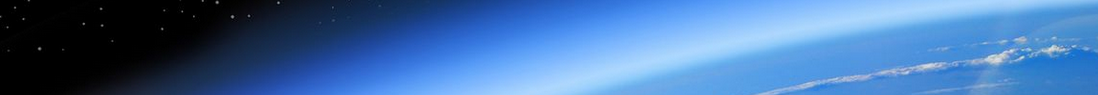


---

In [3]:
# Importing libraries

import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib.animation import FuncAnimation

# Plots open in new window
#%matplotlib tk 

print("NumPy version:", np.__version__) # Ensure the latest version of numpy is installed, otherwise a floating point error will occur
print("Libraries imported")


NumPy version: 1.26.4
Libraries imported


---

### Defining base parameters


$S_0$ = **Average flux entering the earth's atmosphere in [W/m^2]**

$S_0/4 = S_{face}$ = **W/m^2 (Average flux entering earth's atmosphere taking into account ellipsoid geometry**

$ \alpha = Albedo$ = **How much of the initial short wave radiation is sent back out of the atmosphere**

$\sigma = Boltzmann \ constant$ = **Stefan-Boltzmann constant. Relationship between temperature and radiation /m^2 for a blackbody**

$a = Absorptivity$ = **the fraction of longwave radiation that is being absorbed. Longwave = From terrestrial origin**

$ \epsilon = Emissivity$ 
**"the ratio between the actual emitted radiation and the radiation flux that the atmosphere would emit if it would act as a black body"**



In [4]:
S_0 = 1361 
S_face = S_0 / 4
Albedo = 0.3 
Boltzmann_constant = 5.67e-8 
Absorptivity = 0.8 
Emissivity = 0.8 

---

### Part A. Equilibrium surface temperature and equilibrium temperature of the atmosphere

Isolating the constant terms (solar radiation) : left part of the diagram

In [5]:
# Purely looking at initial radiation and albedo (left part)

# In
In_shortwave = S_face # W/m^2
print(In_shortwave,'Shortwave radiation coming in from solar radiation in W/m^2')

# Out
Out_shortwave = S_face * Albedo # W/m^2
print(Out_shortwave,'Shortwave radiation going out from solar radiation reflected by albedo in W/m^2')

# Net
diff_radiation_shortwave = In_shortwave - Out_shortwave 
print(diff_radiation_shortwave,'Net shortwave radiation in W/m^2')

340.25 Shortwave radiation coming in from solar radiation in W/m^2
102.075 Shortwave radiation going out from solar radiation reflected by albedo in W/m^2
238.175 Net shortwave radiation in W/m^2























Solar radiation coming in and out are constant in this model. Since the incoming radiation $S_0 /4$ is larger than the flux solar radiation going out $S_0/4 * \alpha$, it will have to be compensated by the other terms.

---

The flux out comes from longwave radiation from two sources:
1. The radiation from the ground (Blackbody radiation)
2. The radiation coming from the atmosphere.

We know that 
$$ S_0/4*(1-\alpha) = (1-a) \sigma T_g ^4 + \epsilon \sigma T_a ^4$$ 
(from energy balance, flux in = flux out (ground + atmosphere))


$T_g$ is the main variable as T_a can be expressed as a function of $T_g$.

$$T_a^4 = \frac{a}{\epsilon} \frac{T_g^4}{2}$$
$$T_a = \frac {T_g}{2^{1/4}}$$

We can therefore find equilibrium surface temperature by varying $T_g$ and seeing where the total flux going out = total flux going in. 

In [6]:
print(np.__version__)
### I have realized that with numpy versions <1.25.0, the T_a computation will result in a floating point error.


T_g = np.arange(0, 300, 1)
T_a = T_g / 2**(1/4)
Out_longwave_ground = (1-Absorptivity) * Boltzmann_constant * T_g**4
Out_longwave_atmosphere = Emissivity * Boltzmann_constant * T_a**4

In_longwave_atmosphere = - np.copy(Out_longwave_ground)

Out_longwave = Out_longwave_ground + Out_longwave_atmosphere

1.26.4


Solution found by varying t_g and finding equilibrium position. This can also be done analytically. The temperature of the ground at equilibrium is found to be 290K.

Ground temperature at equilibrium: 290 K
Atmospheric temperature at equilibrium: 243.85996042357723 K


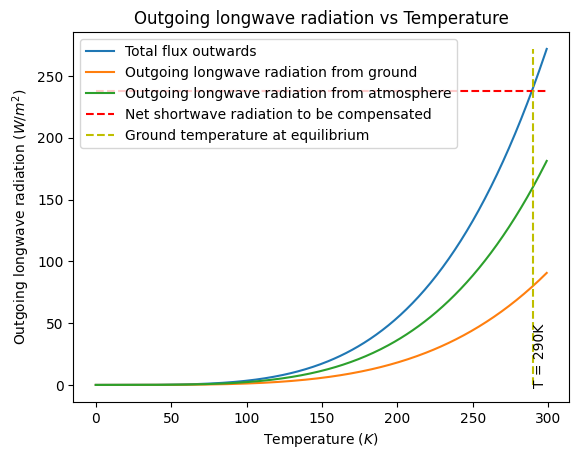

In [7]:

plt.plot(T_g, Out_longwave,label='Total flux outwards')
plt.plot(T_g, Out_longwave_ground, label='Outgoing longwave radiation from ground')
plt.plot(T_g, Out_longwave_atmosphere, label='Outgoing longwave radiation from atmosphere')
plt.hlines(diff_radiation_shortwave, 0, np.max(T_g), colors='r', linestyles='dashed',label='Net shortwave radiation to be compensated')

plt.xlabel('Temperature $(K)$')
plt.ylabel('Outgoing longwave radiation $(W/m^2)$')
plt.title('Outgoing longwave radiation vs Temperature')

ground_temperature_equilibrium = np.min(np.where(Out_longwave > diff_radiation_shortwave))
air_temperature_equilibrium = T_a[ground_temperature_equilibrium]
print('Ground temperature at equilibrium:',T_g[ground_temperature_equilibrium],'K')
print('Atmospheric temperature at equilibrium:',T_a[ground_temperature_equilibrium],'K')

plt.vlines(T_g[ground_temperature_equilibrium], 0, np.max(Out_longwave), colors='y', linestyles='dashed',label='Ground temperature at equilibrium')
plt.text(T_g[ground_temperature_equilibrium], 0, f'T = 290K', rotation=90)
plt.legend()



According to this 1 layer model, the $T_g$ = 290 k, the $T_a$ = 243.85 K at equilibrium

In degrees Celcius this is equal to 16.15C which is reasonably close to measurements from litterature https://agupubs.onlinelibrary.wiley.com/doi/10.1029/1999RG900002 (13.4-14C). This is especially remarkable given the simplicity of this model.

In [8]:
ground_temperature_equilibrium_celcius = T_g[ground_temperature_equilibrium] - 273.15
print('Ground temperature at equilibrium:',ground_temperature_equilibrium_celcius,'C')

Ground temperature at equilibrium: 16.850000000000023 C


In the following graph, the energy balance of the idealized gas model is visualized. It can be seen that the influx and the outflux are equal. Most of the flux coming out comes from longwave radiation from the athmsophere 


Outgoing longwave radiation from ground at equilibrium: 80.20566539999999 W/m^2
Outgoing longwave radiation from atmosphere at equilibrium: 160.41133080000006 W/m^2


Text(0.5, 1.0, 'Energy balance of Idealized greenhouse model')

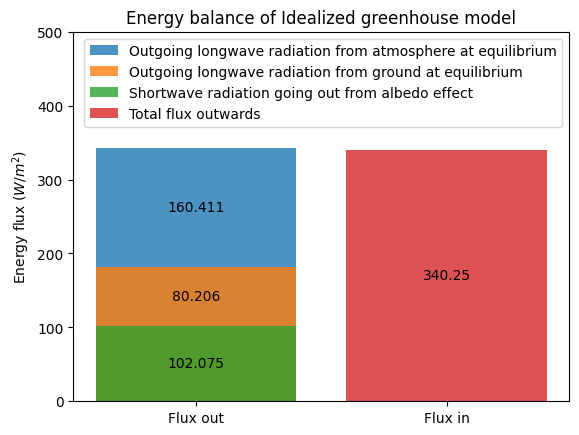

In [9]:
# Creating a visual representation of the energy balance


Out_longwave_ground_equilibrium = (1-Absorptivity) * Boltzmann_constant * ground_temperature_equilibrium**4
Out_longwave_atmosphere_equilibrium = Emissivity * Boltzmann_constant * air_temperature_equilibrium**4

                                                                        

bar_bottom = Out_shortwave
bar_middle = bar_bottom + Out_longwave_ground_equilibrium
bar_top = bar_middle + Out_longwave_atmosphere_equilibrium

print('Outgoing longwave radiation from ground at equilibrium:',Out_longwave_ground_equilibrium,'W/m^2')
print('Outgoing longwave radiation from atmosphere at equilibrium:',Out_longwave_atmosphere_equilibrium,'W/m^2')

plt.figure()
plt.bar(1,bar_top,label='Outgoing longwave radiation from atmosphere at equilibrium',alpha=0.8)
plt.bar(1, bar_middle,label='Outgoing longwave radiation from ground at equilibrium',alpha=0.8)
plt.bar(1, bar_bottom,label='Shortwave radiation going out from albedo effect',alpha=0.8)

plt.bar(2 , In_shortwave,label='Total flux outwards',alpha=0.8)
plt.legend()
plt.ylabel('Energy flux $(W/m^2)$')
plt.ylim(0, 500)

plt.text(1, bar_bottom/2, np.round(Out_shortwave,3), ha='center', va='center')
plt.text(1, (bar_bottom+bar_middle)/2, np.round(Out_longwave_ground_equilibrium,3), ha='center', va='center')
plt.text(1, (bar_middle+bar_top)/2, np.round(Out_longwave_atmosphere_equilibrium,3), ha='center', va='center')
plt.text(2, In_shortwave/2, In_shortwave, ha='center', va='center')

plt.xticks([1,2],['Flux out','Flux in'])

plt.title('Energy balance of Idealized greenhouse model')

---

### Part B. Derivation of Transmitivity for 2 layers



$\tau_{single}$ = transmitivity single layer model

$\epsilon_{single}$ = emissivity single layer model

$\tau_{1}$ = transmitivity of lower layer, two layer model

$\epsilon_{1}$ = emissivity of lower layer, two layer model

$\tau_{2}$ = transmitivity of upper layer, two layer model

$\epsilon_{2}$ = emissivity of upper layer, two layer model

$\tau_{total}$ = total transmitivity of two layer model 


Given :
$$\tau _{single} = (1-\epsilon_{single})

Therefore :

$$\tau_{1} = (1-\epsilon_{1})$$

and


$$\tau_{2} = (1-\epsilon_{2})$$


transmitivity $(\tau)$ represents a fraction, therefore to find total transmitivity, we can use the product: What is the fraction of the fraction that goes through ?

$$\tau_{total} = \tau_1 * \tau_2 = (1-\epsilon_1)(1-\epsilon_2)$$



Given that $\epsilon_1 = \epsilon_2 = \epsilon_{1,2}$

$$ \tau_{total} = (1-\epsilon_{1,2})^2$$

The total transmitiviy should be equal to the initial one layer transmisivity

$$ \tau_{total} = (1-\epsilon_{single})

Therefore

$$ (1-\epsilon_{single}) = (1-\epsilon_{1,2})^2$$

Rearrange

$$1- \sqrt{1 -\epsilon_{single}} = \epsilon_{1,2}  

End of Proof

---

### Part C. Calculate surface temperature of two layer problem and create vertical profile

Start by finding the new Emissivity for a two layer problem

In [10]:
emissivity_two_layer = 1- np.sqrt(1-Emissivity)
print('Emissivity of two layer model:',emissivity_two_layer)

Emissivity of two layer model: 0.5527864045000421


For more than 1 layer atmopheric model, we can create a system of linear equations that will satsify the energy balance per layer. Note that I also include the emissivity from $a_2$ to the surface. This is absent in the provided diagram.

$$ \begin{bmatrix}
(1-\epsilon)\epsilon \sigma & \epsilon ^2 \sigma & -2\epsilon \sigma \\
\epsilon \sigma & -2\epsilon \sigma & \epsilon ^2 \sigma \\
- \sigma & \epsilon \sigma & (1-\epsilon)\epsilon \sigma 
\end{bmatrix} *  \begin{bmatrix}
T_g^4 \\
T_1^4 \\
T_2^4 
\end{bmatrix}  = 
\begin{bmatrix}
0 \\
0 \\
- S_0 /4 * (1-\alpha) 
\end{bmatrix} 

$$




In [11]:
two_layer_matrix = np.zeros((3,3))
two_layer_matrix[0,0] = (1-emissivity_two_layer) * emissivity_two_layer * Boltzmann_constant
two_layer_matrix[2,2] = (1-emissivity_two_layer) * emissivity_two_layer * Boltzmann_constant
two_layer_matrix[0,1] = emissivity_two_layer**2 * Boltzmann_constant
two_layer_matrix[1,2] = emissivity_two_layer**2 * Boltzmann_constant
two_layer_matrix[0,2] = -2 * emissivity_two_layer * Boltzmann_constant
two_layer_matrix[1,1] = -2 * emissivity_two_layer * Boltzmann_constant
two_layer_matrix[2,1] = emissivity_two_layer* Boltzmann_constant
two_layer_matrix[1,0] = emissivity_two_layer* Boltzmann_constant
two_layer_matrix[2,0] = - Boltzmann_constant


print('Two layer matrix:',two_layer_matrix)
b_vector = np.zeros(3)
b_vector[-1] = - S_face* (1-Albedo)

temperatures = sp.linalg.solve(two_layer_matrix, b_vector)
print(temperatures**0.25)

Two layer matrix: [[ 1.40170109e-08  1.73259783e-08 -6.26859783e-08]
 [ 3.13429891e-08 -6.26859783e-08  1.73259783e-08]
 [-5.67000000e-08  3.13429891e-08  1.40170109e-08]]
[293.39231902 259.10336324 232.11067808]


In [12]:
vertical_column = [0,5000,10000]

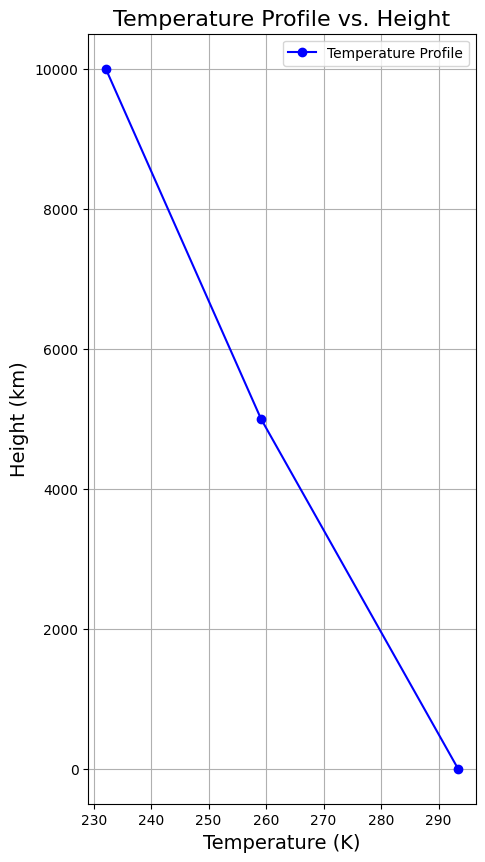

In [13]:
import matplotlib.pyplot as plt
import numpy as np


# Create the plot with a specified figure size
plt.figure(figsize=(5, 10))

# Add labels with increased font size for clarity
plt.xlabel('Temperature (K)', fontsize=14)
plt.ylabel('Height (km)', fontsize=14)

# Plot the data with a custom line style, color, and markers
plt.plot(temperatures**0.25, vertical_column, linestyle='-', color='blue', marker='o', label='Temperature Profile')

# Add a grid for better readability
plt.grid(True)

# Add a title with increased font size
plt.title('Temperature Profile vs. Height', fontsize=16)

# Add a legend to explain the plot elements
plt.legend()

# Show the plot
plt.show()

In [14]:
print('Temperature profile:',temperatures**0.25,'in k')

Temperature profile: [293.39231902 259.10336324 232.11067808] in k


The ground temperature is 3 K higher than the 1 layer problem. This makes sense as we are adding an additional layer that acts as a greenhouse. There is now blackbody radiation that is transmitted from $A_2$ and $A_1$ -> There is more radiation that is absorbed by the layers and re-emmited in all directions.

---

### Part D. $n$ layer model  transmissivity

Same derivation as in part B except that :
$$\tau_{total} = \tau_n * \tau_{n-1} * ... * \tau_{0}= (1-\epsilon_n)(1-\epsilon_{n-1}) ... (1-\epsilon_0)$$

$$ \tau_{total} = (1-\epsilon_{n_{all}})^n $$
$$ (1-\epsilon_{single}) = (1-\epsilon_{n_{all}})^n $$
$$1- \sqrt[n]{1 -\epsilon_{single}} = \epsilon_{n_{all}}$$

---

### Part E. Linear solver for n layers

Matrix format for n number of layers :

let $n$ be the number of layers

$$ \begin{bmatrix}
(1-\sigma)^{n-1}\epsilon \sigma & (1-\sigma)^{n-2}\epsilon^2 \sigma & (1-\sigma)^{n-3}\epsilon^2 \sigma & ... & (1-\epsilon)\epsilon^2 \sigma & \epsilon^2 \sigma & a_72\epsilon \sigma \\
(1-\sigma)^{n-2}\epsilon \sigma & b_2 & ... & (1-\epsilon)\epsilon^2 \sigma_4 & \epsilon^2 \sigma & 2\epsilon \sigma & \epsilon^2 \sigma \\
(1-\sigma)^{n-3}\epsilon \sigma & ... & (1-\epsilon)\epsilon^2 \sigma & c_4\epsilon^2 \sigma & 2\epsilon \sigma & \epsilon^2 \sigma & (1-\epsilon)\epsilon^2 \sigma \\
... & (1-\epsilon)\epsilon^2 \sigma & \epsilon^2 \sigma & 2\epsilon \sigma & \epsilon^2 \sigma & (1-\epsilon)\epsilon^2 \sigma & ... \\
(1-\epsilon)\epsilon \sigma & \epsilon^2 \sigma & 2\epsilon \sigma & \epsilon^2 \sigma & (1-\epsilon)\epsilon^2 \sigma & ... & (1-\sigma)^{n-3}\epsilon^2 \sigma \\
\epsilon \sigma & 2\epsilon \sigma & \epsilon^2 \sigma & (1-\epsilon)\epsilon^2 \sigma & ... & (1-\sigma)^{n-3}\epsilon^2 \sigma & (1-\sigma)^{n-2}\epsilon^2 \sigma \\
-\sigma & \epsilon \sigma & (1-\epsilon)\epsilon \sigma & ... & (1-\sigma)^{n-3}\epsilon \sigma & (1-\sigma)^{n-2}\epsilon \sigma & (1-\sigma)^{n-1}\epsilon \sigma 
\end{bmatrix} *

\begin{bmatrix}
T_g^4 \\
T_1^4 \\
T_2^4 \\
T_3^4 \\
T_4^4 \\
... \\
T_n^4 
\end{bmatrix}  

= 

\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
... \\
0 \\
-\frac{S_0}{4}* (1-\alpha) 
\end{bmatrix}  $$

This diagonal matrix can then be solved to find equilibrium temperatures of any n number of layer problem.


In [15]:
# Creating a function
def idealized_greenhouse_model(n_layers):

    n_layers = n_layers
    Emissivity_n_layers = 1-(1-Emissivity)**(1/n_layers)

    energy_balance_matrix = np.zeros((n_layers+1,n_layers+1))

    small_power = n_layers+1

    for i in range(0,n_layers+1):
        large_power = n_layers + 1 +i

        for j in range(0,n_layers+1):

            if j == n_layers :
                energy_balance_matrix[i,j] = (1-Emissivity_n_layers)**(n_layers - large_power) * Emissivity_n_layers * Boltzmann_constant
                large_power -= 1
            else:
                energy_balance_matrix[i,j] = (1-Emissivity_n_layers)**(n_layers - large_power) * Emissivity_n_layers**2 * Boltzmann_constant
                large_power -= 1

    for i in range(0,n_layers):
            energy_balance_matrix[i,i] = -2 *Emissivity_n_layers * Boltzmann_constant # Main diagonal
            energy_balance_matrix[i+1,i] = Emissivity_n_layers**2 * Boltzmann_constant # Subdiagonal
            energy_balance_matrix[i,i+1] = Emissivity_n_layers**2 * Boltzmann_constant # Superdiagonal

    energy_balance_matrix[-1,-1] = - Boltzmann_constant # Special value for the surface
    energy_balance_matrix[-1,-2] = Emissivity_n_layers * Boltzmann_constant # Special value for the surface
    energy_balance_matrix[-2,-1] = Emissivity_n_layers * Boltzmann_constant # Special value for the surface

    energy_balance_matrix[n_layers,n_layers] = -Boltzmann_constant # Special value for the surface

    for i in range(n_layers+1):
        for j in range(i+1, n_layers+1):
            # Mirror the value from the right of the diagonal to the left
            energy_balance_matrix[j, i] = energy_balance_matrix[i, j]

    energy_balance_matrix = np.fliplr(energy_balance_matrix)

    b= np.zeros(n_layers+1)

    b[-1] = - S_face*(1- Albedo) #Emissivity_n_layers * Boltzmann_constant * T_g**4  # Boundary condition at the ground

    solutions = sp.linalg.solve(energy_balance_matrix,b)
    temperatures = solutions**0.25
    
    # Create the plot with a specified figure size
    plt.figure(figsize=(5, 10))

    # Add labels with increased font size for clarity
    plt.xlabel('Temperature (K)', fontsize=14)
    plt.ylabel('Height (km)', fontsize=14)

    # Generate the vertical column data
    vertical_column = np.linspace(0, 10, n_layers + 1)
    print(vertical_column)

    # Plot the data with a custom line style, color, and markers
    plt.plot(temperatures, vertical_column, linestyle='-', color='blue', marker='o', label='Temperature Profile')

    # Add a grid for better readability
    plt.grid(True)

    # Add a title with increased font size
    plt.title('Temperature Profile vs. Height', fontsize=16)

    # Add a legend to explain the plot elements
    plt.legend()

    # Show the plot
    plt.show()


    return temperatures



[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


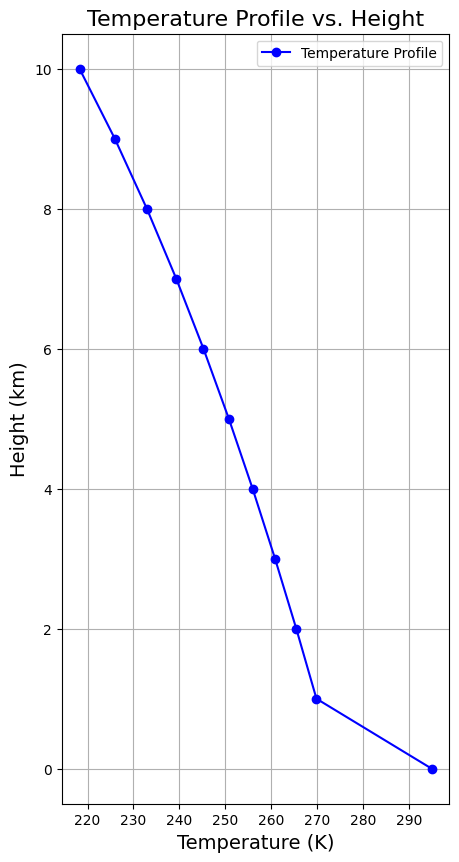

array([295.00297201, 269.87652528, 265.48017502, 260.85387989,
       255.96745557, 250.78398194, 245.2575704 , 239.33010212,
       232.92630023, 225.94598005, 218.2512487 ])

In [16]:
idealized_greenhouse_model(10)
# Change 10 to any number of layers wanted


The surface temperature again changes and increases marginally (2k). This is approximately the convergence temperature -> If we vary our number of layers -> $\infty$ the surface temperature stays at 295

---

### Part F. Convergence ?

Creating a plotting function that shows convergence. Check output gif -> Convergence shown around layer 100

In [17]:
# Creating a function
def idealized_greenhouse_model_noplot(n_layers):

    n_layers = n_layers
    Emissivity_n_layers = 1-(1-Emissivity)**(1/n_layers)

    energy_balance_matrix = np.zeros((n_layers+1,n_layers+1))

    small_power = n_layers+1

    for i in range(0,n_layers+1):
        large_power = n_layers + 1 +i

        for j in range(0,n_layers+1):

            if j == n_layers :
                energy_balance_matrix[i,j] = (1-Emissivity_n_layers)**(n_layers - large_power) * Emissivity_n_layers * Boltzmann_constant
                large_power -= 1
            else:
                energy_balance_matrix[i,j] = (1-Emissivity_n_layers)**(n_layers - large_power) * Emissivity_n_layers**2 * Boltzmann_constant
                large_power -= 1

    for i in range(0,n_layers):
            energy_balance_matrix[i,i] = -2 *Emissivity_n_layers * Boltzmann_constant # Main diagonal
            energy_balance_matrix[i+1,i] = Emissivity_n_layers**2 * Boltzmann_constant # Subdiagonal
            energy_balance_matrix[i,i+1] = Emissivity_n_layers**2 * Boltzmann_constant # Superdiagonal

    energy_balance_matrix[-1,-1] = - Boltzmann_constant # Special value for the surface
    energy_balance_matrix[-1,-2] = Emissivity_n_layers * Boltzmann_constant # Special value for the surface
    energy_balance_matrix[-2,-1] = Emissivity_n_layers * Boltzmann_constant # Special value for the surface

    energy_balance_matrix[n_layers,n_layers] = -Boltzmann_constant # Special value for the surface

    for i in range(n_layers+1):
        for j in range(i+1, n_layers+1):
            # Mirror the value from the right of the diagonal to the left
            energy_balance_matrix[j, i] = energy_balance_matrix[i, j]

    energy_balance_matrix = np.fliplr(energy_balance_matrix)

    b= np.zeros(n_layers+1)

    b[-1] = - S_face*(1- Albedo) #Emissivity_n_layers * Boltzmann_constant * T_g**4  # Boundary condition at the ground

    solutions = sp.linalg.solve(energy_balance_matrix,b)
    temperatures = solutions**0.25

    return temperatures



MovieWriter ffmpeg unavailable; using Pillow instead.


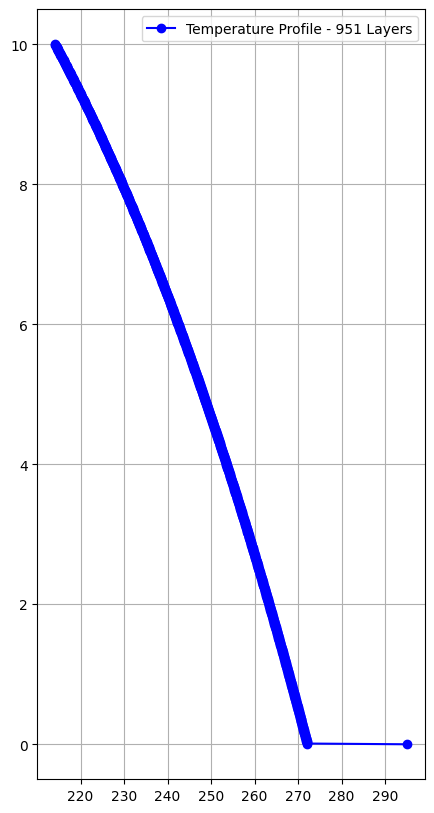

In [18]:
# if not plotting in jupyter notebook unhash the next line

#%matplotlib tk

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assume the idealized_greenhouse_model function is defined here

# Initialize the plot
fig, ax = plt.subplots(figsize=(5, 10))
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('Height (km)', fontsize=14)
ax.set_title('Temperature Profile vs. Height', fontsize=16)

# This function updates the plot for each frame
def update_plot(n_layers):
    ax.clear()
    temperatures = idealized_greenhouse_model_noplot(n_layers)
    vertical_column = np.linspace(0, 10, n_layers + 1)
    ax.plot(temperatures, vertical_column, linestyle='-', color='blue', marker='o', label=f'Temperature Profile - {n_layers} Layers')
    ax.legend()
    ax.grid(True)

# Create the animation
ani = FuncAnimation(fig, update_plot, frames=np.arange(1, 1000,50), repeat=False)

# To save the animation, uncomment the next line (requires ffmpeg installed)
ani.save('greenhouse_effect.gif')

# To display the animation in a Jupyter notebook, use the following (requires IPython.display and HTML):
from IPython.display import HTML

plt.show()
